In [2]:
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import numpy as np


def set_tick_size(size):
    for tick in plt.gca().xaxis.get_major_ticks():
        tick.label.set_fontsize(size) 
    for tick in plt.gca().yaxis.get_major_ticks():
        tick.label.set_fontsize(size) 

def smooth(y, box_pts=3):
    box = np.ones(box_pts) / box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

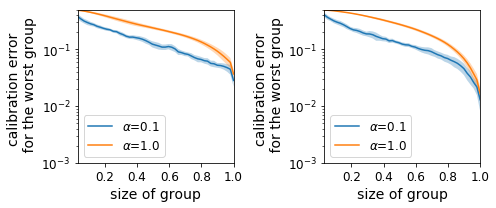

In [19]:
coeffs = [0.1, 1.0]
ratios = np.linspace(0.01, 1.0, 50)
group_index = 2
recalibs = ['False--1', 'True-2']

plt.figure(figsize=(3 * len(recalibs) + 1, 3))
for i, recalib in enumerate(recalibs):
    plt.subplot(1, len(recalibs), i+1)
    # i, loss, loss_nll(2), loss_stddev, ece0.1(4), ece0.2, ece1.0, ecew, ecew2
    for c, coeff in enumerate(coeffs):
        eces = []
        for run in range(0, 6):
            log_dir = 'log/coeff=%.2f-recalib=%s-run=%d/result.txt' % (coeff, recalib, run)
            reader = open(log_dir, 'r')

            line = reader.readline().split() 
            line = reader.readline().split() 
            assert len(line) == 50
            eces.append(np.array([float(item) for item in line]))
        eces = np.stack(eces, axis=0)
        ece_mean = smooth(np.mean(eces, axis=0))
        ece_std = smooth(np.std(eces, axis=0))
        
        plt.plot(ratios, ece_mean, label=r'$\alpha$=%.1f' % coeff)
        plt.fill_between(ratios, ece_mean-ece_std, ece_mean+ece_std, alpha=0.3)
        plt.xlim([0.03, 1])
        plt.ylim([0.001, 0.5])
        # plt.xscale('log')
    plt.xlabel('size of group', fontsize=14)
    plt.ylabel('calibration error \n for the worst group', fontsize=14)
    plt.yscale('log')
    set_tick_size(12)
    plt.legend(fontsize=12)
plt.tight_layout()
plt.show()